In [1]:
#Importing Necessary libraries
import pandas as pd
from sklearn.datasets import load_iris



In [2]:
#Loading the iris dataset
data = load_iris()
dataset = pd.DataFrame(data = data['data'], columns=data['feature_names'])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#Defining features and target
from sklearn.model_selection import train_test_split

X = dataset.copy()
y = data['target']

In [4]:
#Viewing features
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Viewing target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#Splitting Data into training and testing sets- (7:3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
print(f" X_train.shape:{X_train.shape}\n X_test.shape:{X_test.shape}\n Y_train.shape:{y_train.shape}\n Y_test.shape:{y_test.shape}")

 X_train.shape:(105, 4)
 X_test.shape:(45, 4)
 Y_train.shape:(105,)
 Y_test.shape:(45,)


In [8]:
#Initializing the DecisionTree Classifier before pruning
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=5,min_impurity_decrease = 0.0,min_samples_leaf = 1,splitter='best')

In [9]:
#training the model on training datatsets
clf.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
#Viewing model parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [11]:
#Making predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [12]:
#Getting feature names
feature_names = X.columns
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

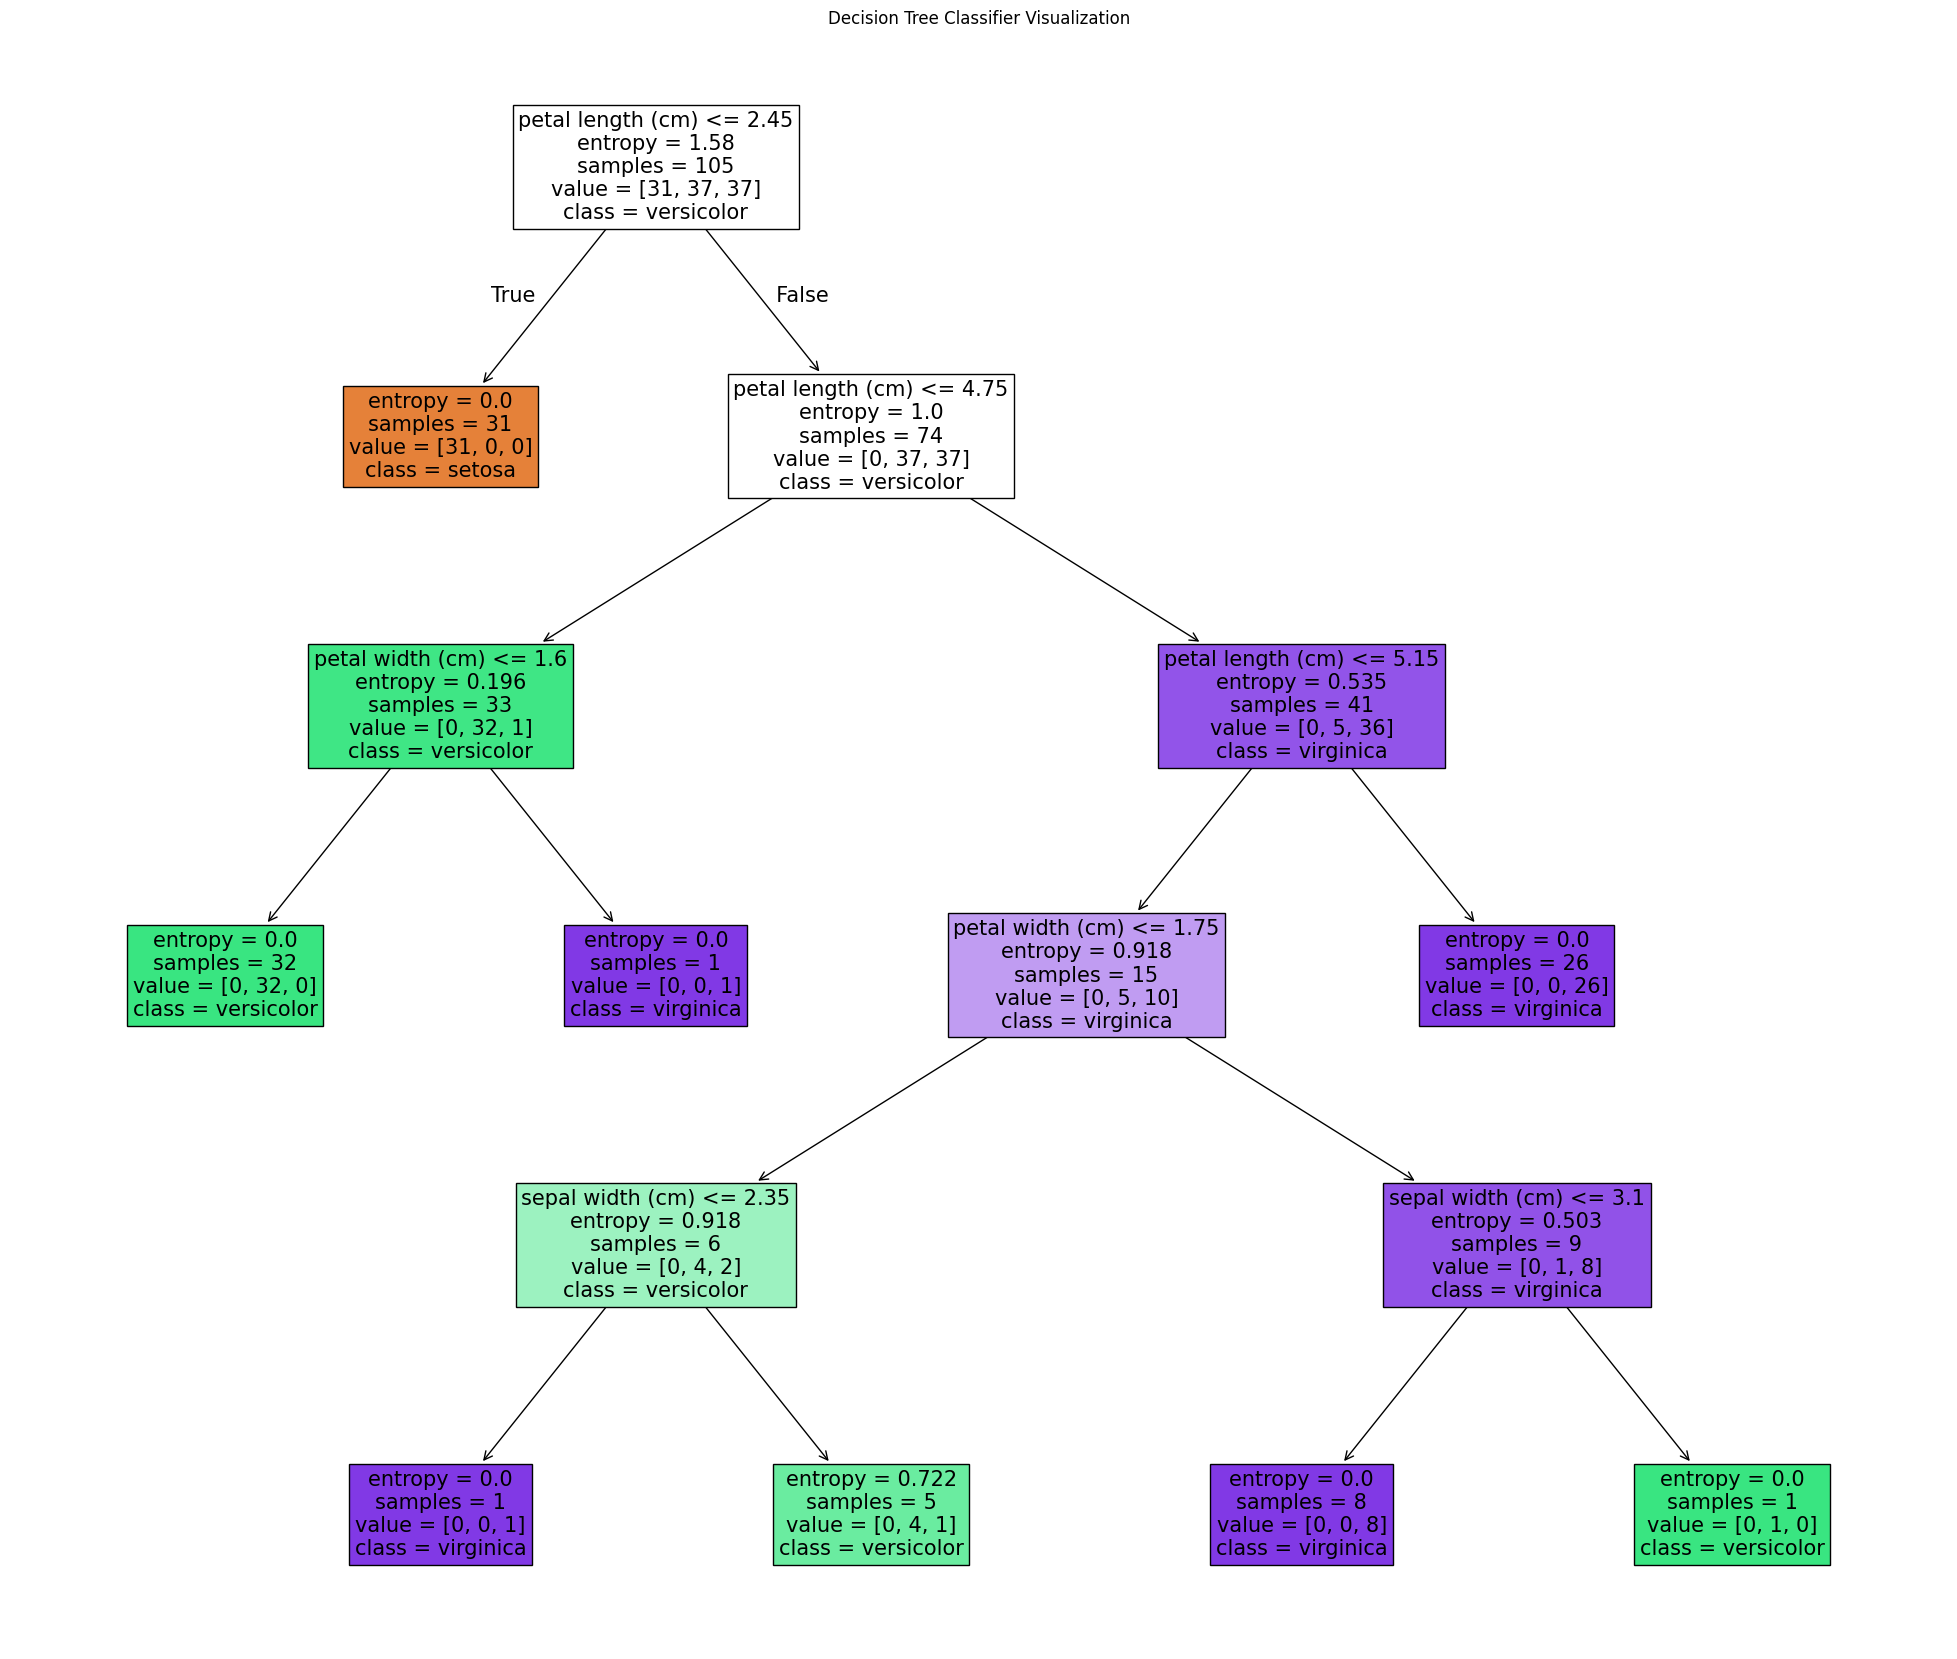

In [13]:
#Visualizing tree before pruning
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,21))
plot_tree(clf,filled=True, feature_names = feature_names,class_names = {0:'setosa',1:'versicolor',2:'virginica'},fontsize=15)
plt.title('Decision Tree Classifier Visualization')
plt.show()

In [14]:
#Displaying tree structure info
print(f"Original Tree's  ccp_alpha: {clf.ccp_alpha:.6f}")
print(f"Original tree nodes: {clf.tree_.node_count}")
print(f"Original tree depth: {clf.tree_.max_depth}")


Original Tree's  ccp_alpha: 0.000000
Original tree nodes: 15
Original tree depth: 5


In [15]:
#Evaluating the model's performance before pruning
from sklearn.metrics import classification_report

print("Classification Report",classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [16]:
from sklearn.metrics import accuracy_score, f1_score
print(f"Accuracy:\n{accuracy_score(y_test,y_pred)}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro')}")

Accuracy:
0.9777777777777777
F1 Score (macro): 0.974320987654321


In [17]:
#Applying Cost Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [18]:
#Training Multiple trees using different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

In [19]:
#Determining the training and Testing Scores
train_scores =[clf.score(X_train,y_train) for clf in clfs]
test_scores =[clf.score(X_test,y_test) for clf in clfs]

In [20]:
train_scores

[1.0,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.3523809523809524,
 0.3523809523809524]

In [21]:
test_scores

[1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.28888888888888886,
 0.28888888888888886]

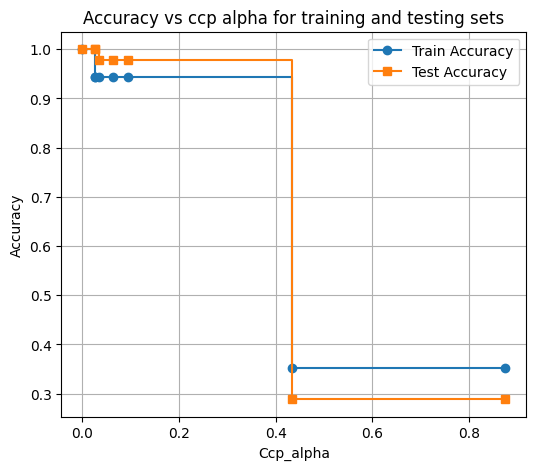

In [22]:
#Plotting the accuracy vs alpha graph
plt.figure(figsize = (6,5))
plt.plot(ccp_alphas,train_scores,marker='o',label ='Train Accuracy',drawstyle ='steps-post'

)
plt.plot(ccp_alphas,test_scores,marker='s',label ='Test Accuracy',drawstyle ='steps-post')

plt.xlabel('Ccp_alpha')
plt.ylabel('Accuracy')
plt.title("Accuracy vs ccp alpha for training and testing sets")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#choosing the best alpha manually and retraining the tree
best_ccp_alpha = 0.01
best_clf = DecisionTreeClassifier(random_state=42,ccp_alpha=best_ccp_alpha,criterion='entropy',max_depth=4)
best_clf.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
#Predicting testing data with pruned tree
y_pred_pruned = best_clf.predict(X_test)

In [25]:
y_pred_pruned

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Text(0.5, 1.0, ' Pruned Decision Tree Classifier Visualization (with ccp_alpha:best_ccp_alpha)')

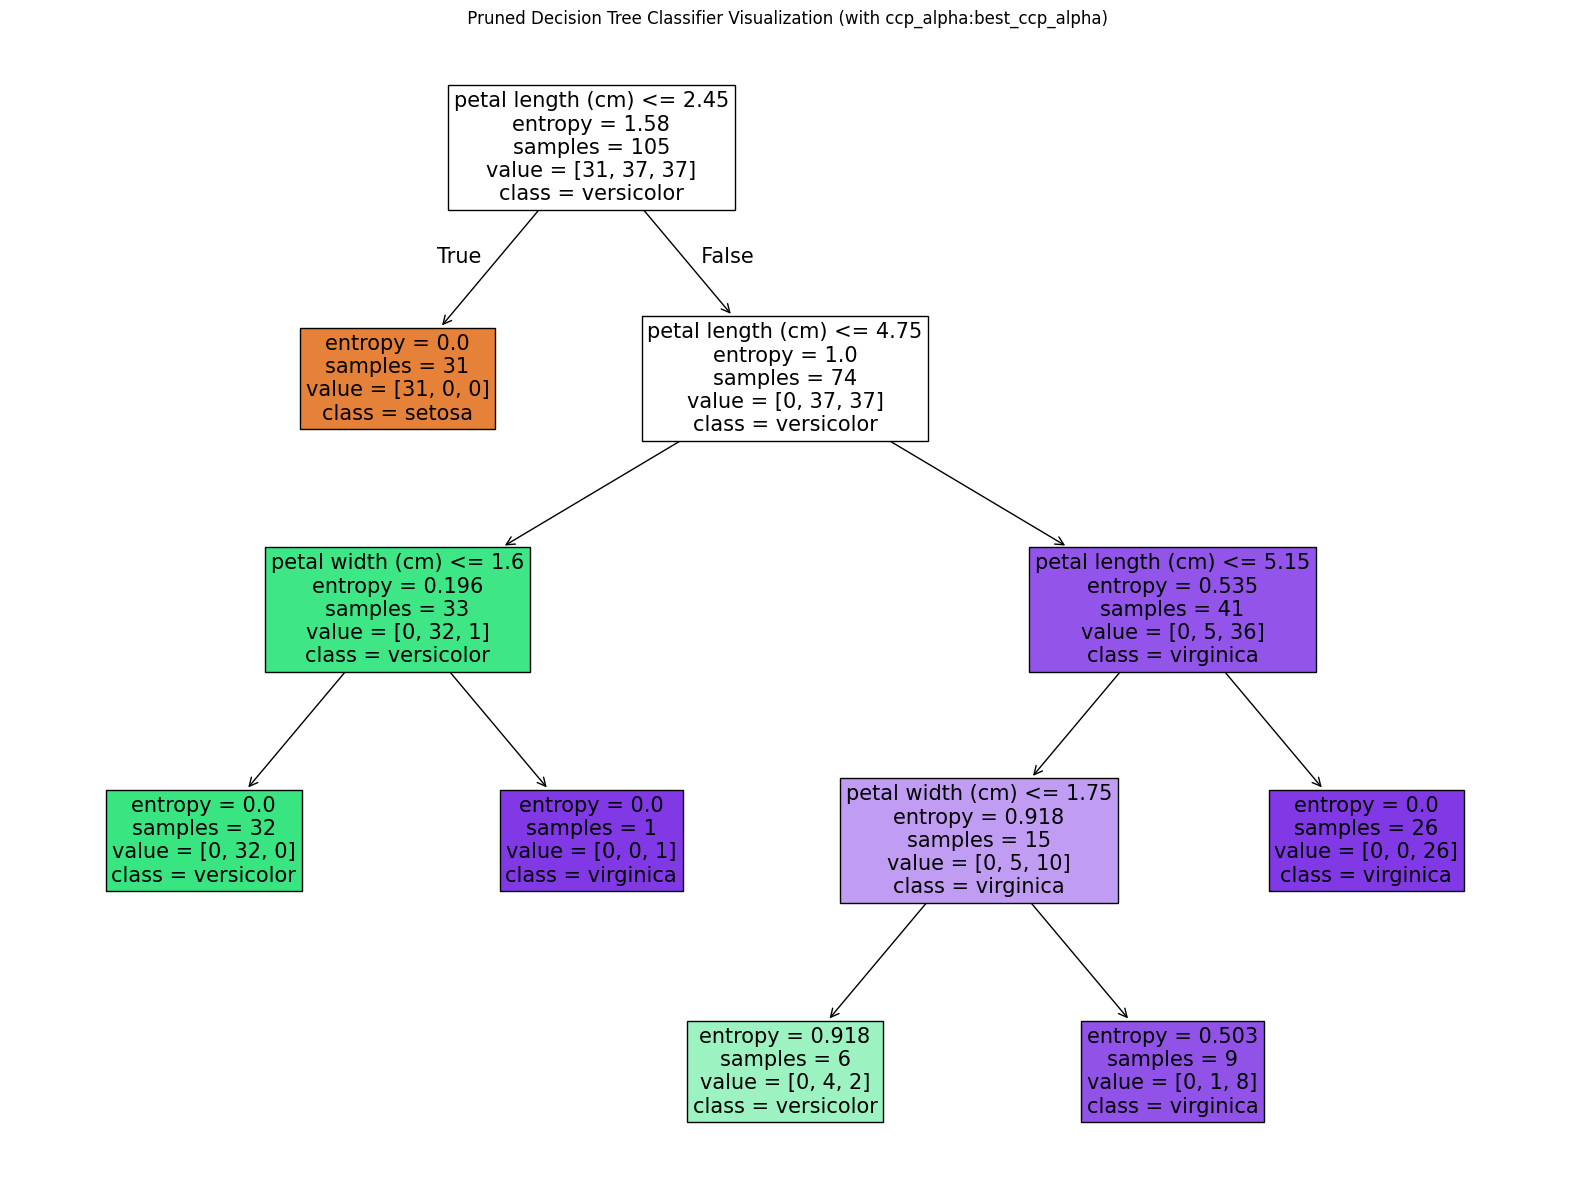

In [26]:
#visualizing  tree after pruning
plt.figure(figsize=(20,15))
plot_tree(best_clf,filled=True,feature_names=feature_names,class_names={0:'setosa',1:'versicolor',2:'virginica'},fontsize=15)
plt.title(' Pruned Decision Tree Classifier Visualization (with ccp_alpha:best_ccp_alpha)')

In [27]:
#Displaying tree structures after pruning
print(f"Best ccp_alpha: {best_ccp_alpha:.6f}")
print(f"Pruned tree nodes: {best_clf.tree_.node_count}")
print(f"Pruned tree depth: {best_clf.tree_.max_depth}")

Best ccp_alpha: 0.010000
Pruned tree nodes: 11
Pruned tree depth: 4


In [28]:
#classification report,accuracy,confusion matrix,f1_score after pruning
from sklearn.metrics import classification_report
print(f"Classification Report:\n{classification_report(y_test,y_pred_pruned)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
from sklearn.metrics import accuracy_score,f1_score
print(f"Accuracy:\n{accuracy_score(y_test,y_pred_pruned)}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred_pruned, average='macro')}")

Accuracy:
1.0
F1 Score (macro): 1.0
